/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yZhvtAn0c7KDaQqhgNMNYmNEET61uK98
To: /content/ankush.zip
100% 43.3M/43.3M [00:01<00:00, 42.9MB/s]
Archive:  ankush.zip
  inflating: test/Leaf smut/DSC_0500.jpg  
  inflating: test/Leaf smut/DSC_0502.jpg  
  inflating: test/Leaf smut/DSC_0512.jpg  
  inflating: test/Leaf smut/DSC_0320.JPG  
  inflating: test/Leaf smut/DSC_0501.jpg  
  inflating: test/Leaf smut/DSC_0330.jpg  
  inflating: test/Leaf smut/DSC_0504.jpg  
  inflating: test/Leaf smut/DSC_0316.JPG  
  inflating: test/Bacterial leaf blight/DSC_0383.JPG  
  inflating: test/Bacterial leaf blight/DSC_0384.JPG  
  inflating: test/Bacterial leaf blight/DSC_0372.JPG  
  inflating: test/Bacterial leaf blight/DSC_0376.JPG  
  inflating: test/Bacterial leaf blight/DSC_0374

Text(0.5, 1.0, 'Confusion Matrix')

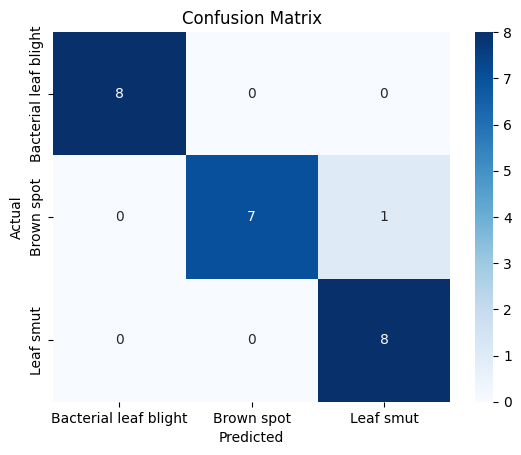

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from google.colab import drive
import seaborn as sns
!gdown --id 1yZhvtAn0c7KDaQqhgNMNYmNEET61uK98

!unzip ankush.zip
# Set the paths to the training, validation and testing directories
train_path = 'train'
val_path = 'val'
test_path = 'test'

# Define the data generators for training, validation and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size=(320, 320), # Increase image size
    batch_size=16, # Decrease batch size
    class_mode='categorical',
    shuffle=False
)

val_dataset = val_datagen.flow_from_directory(
    val_path,
    target_size=(320, 320), # Increase image size
    batch_size=16, # Decrease batch size
    class_mode='categorical',
    shuffle=False
)

test_dataset = test_datagen.flow_from_directory(
    test_path,
    target_size=(320, 320), # Increase image size
    batch_size=16, # Decrease batch size
    class_mode='categorical',
    shuffle=False
)

# Load the pre-trained convolutional base of the model
conv_base = keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(320, 320, 3)
)

# Extract features from the training set using the pre-trained convolutional base
train_features = conv_base.predict(train_dataset, verbose=1)

# Extract features from the validation set using the pre-trained convolutional base
val_features = conv_base.predict(val_dataset, verbose=1)

# Extract features from the test set using the pre-trained convolutional base
test_features = conv_base.predict(test_dataset, verbose=1)

# Reshape the features to 2D arrays
train_features = np.reshape(train_features, (train_features.shape[0], -1))
val_features = np.reshape(val_features, (val_features.shape[0], -1))
test_features = np.reshape(test_features, (test_features.shape[0], -1))

# Get the labels for the training and validation sets
train_labels = train_dataset.classes
val_labels = val_dataset.classes

X = train_features
y = train_labels
# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_features, train_labels)

# Evaluate the model on the validation set
val_pred = clf.predict(val_features)
val_f1_score = f1_score(val_labels, val_pred, average='weighted')
print('Validation Weighted F1 score:', val_f1_score)

# Evaluate the model on the test set and generate a classification report
test_pred = clf.predict(test_features)
target_names = list(test_dataset.class_indices.keys())
print('Classification Report:')
print(classification_report(test_dataset.classes, test_pred, target_names=target_names))

# Use cross-validation to get an estimate of the model's performance
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross validation
scores = cross_val_score(clf, X, y, cv=10)

# Print the accuracy score for each fold
for i, score in enumerate(scores):
    print("Fold %d: %0.2f" % (i+1, score))

# Calculate the mean accuracy score and standard deviation
mean_score = scores.mean()
std_score = scores.std()

# Print the mean and standard deviation
print("Mean score: %0.2f" % mean_score)
print("Standard deviation: %0.2f" % std_score)




# Generate a confusion matrix for the test set
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_dataset.classes, test_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')



Number of training classes: 3
Number of validation classes: 3
Number of test classes: 3


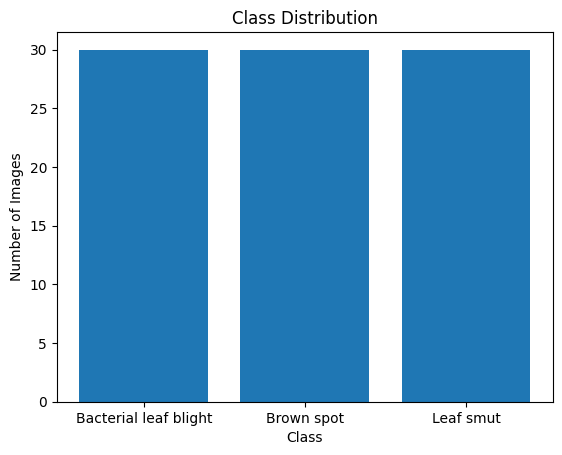

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the paths to the training, validation and testing directories
train_path = 'train'
val_path = 'val'
test_path = 'test'

# Get the number of images in each directory
num_train = len(os.listdir(train_path))
num_val = len(os.listdir(val_path))
num_test = len(os.listdir(test_path))

# Print the number of images in each directory
print('Number of training classes:', num_train)
print('Number of validation classes:', num_val)
print('Number of test classes:', num_test)

# Get the class names and indices from the training set
class_indices = train_dataset.class_indices
class_names = list(class_indices.keys())

# Count the number of images in each class
num_images_per_class = [len(os.listdir(os.path.join(train_path, class_name))) for class_name in class_names]

# Plot a histogram of the class distribution
plt.bar(class_names, num_images_per_class)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


In [ ]:
# Define the hyperparameters to tune will take approx 4 min to load

hyperparameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Create a random forest classifier with default parameters
clf = RandomForestClassifier(random_state=42)

# Use grid search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(clf, hyperparameters, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(train_features, train_labels)

# Print the best hyperparameters and F1 score
print('Best hyperparameters:', grid_search.best_params_)

# Use the best hyperparameters to train a new model and evaluate on the test set
clf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
clf.fit(train_features, train_labels)

# Evaluate the model on the validation set
val_pred = clf.predict(val_features)
val_f1_score = f1_score(val_labels, val_pred, average='weighted')
print('Validation Weighted F1 score:', val_f1_score)

# Evaluate the model on the test set and generate a classification report
test_pred = clf.predict(test_features)
target_names = list(test_dataset.class_indices.keys())
print('Classification Report:')
print(classification_report(test_dataset.classes, test_pred, target_names=target_names))
best_hyperparameters = grid_search.best_params_
best_max_depth = best_hyperparameters['max_depth']
print("Best max_depth:", best_max_depth)



Best hyperparameters: {'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Validation Weighted F1 score: 0.6428571428571428
Classification Report:
                       precision    recall  f1-score   support

Bacterial leaf blight       0.89      1.00      0.94         8
           Brown spot       0.75      0.75      0.75         8
            Leaf smut       0.71      0.62      0.67         8

             accuracy                           0.79        24
            macro avg       0.78      0.79      0.79        24
         weighted avg       0.78      0.79      0.79        24

Best max_depth: 5


Text(0.5, 1.0, 'Confusion Matrix')

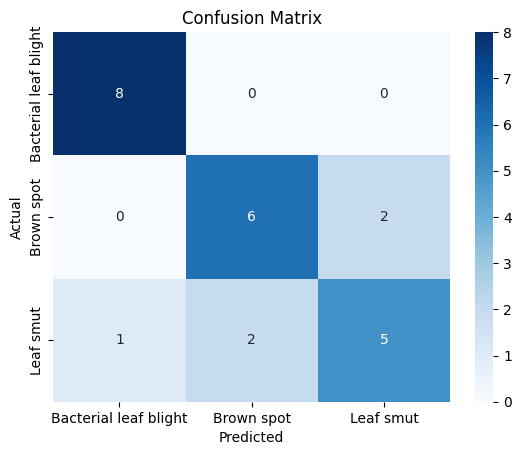

In [ ]:
# Generate a confusion matrix for the test set
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_dataset.classes, test_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')